In [1]:
import torch
import torchaudio

import librosa
import matplotlib.pyplot as plt

import numpy as np

In [12]:
audio_file = "/home/martinoywa/Music/Chill Hits/Clinton Kane/CHICKEN TENDIES/01 CHICKEN TENDIES.mp3"

In [18]:
signal, sr = torchaudio.load(audio_file)

print(f"Shape: {signal.shape}, Sample Rate: {sr}")

Shape: torch.Size([2, 8661888]), Sample Rate: 44100


In [19]:
# parameters
SAMPLE_RATE = 44100
NFFT = 1024
HL = 512
MELS = 64
NUMBER_OF_SAMPLES = 88200

In [20]:
# mel spectrogram transformer
transformer = torchaudio.transforms.MelSpectrogram(
    sample_rate=SAMPLE_RATE,
    n_fft=NFFT,
    hop_length=HL,
    n_mels=MELS,
    center=True,
    pad_mode="reflect",
    power=2.0,
    norm='slaney',
    onesided=True,
    mel_scale="htk"
)

# mix down or convert to mono channel
def mix_down_if_necessary(signal):
    if signal.shape[0] > 1:
        signal = torch.mean(signal, dim=0, keepdim=True)
    return signal

# resample to SAMPLE_RATE
def resample_if_necessary(signal, sr):
    if sr != SAMPLE_RATE:
        resampler = torchaudio.transforms.Resample(
            orig_freq=sr,
            new_freq=SAMPLE_RATE
        )
        signal = resampler(signal)
    return signal

# cut signal if longer than NUMBER_OF_SAMPLES
def cut_if_necessary(signal):
    if signal.shape[1] > NUMBER_OF_SAMPLES:
        signal = signal[:, :NUMBER_OF_SAMPLES]
    return signal

# right pad if necessary if less than NUMBER_OF_SAMPLES
def right_pad_if_necessary(signal):
    if signal.shape[1] < NUMBER_OF_SAMPLES:
        num_to_pad = NUMBER_OF_SAMPLES - signal.shape[1]
        signal = torch.nn.functional.pad(signal, (0,num_to_pad))
    return signal

In [21]:
signal = mix_down_if_necessary(signal)
signal = resample_if_necessary(signal, sr)
signal = cut_if_necessary(signal)
signal = right_pad_if_necessary(signal)
signal = transformer(signal)

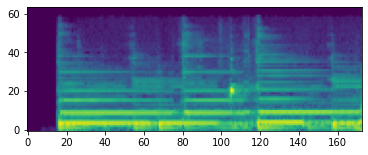

In [22]:
# plt.rcParams["figure.figsize"] = [7.50, 3.50]
# plt.rcParams["figure.autolayout"] = True
plt.imshow(librosa.power_to_db(signal[0], ref=np.max), origin="lower")

In [8]:
plt.imsave("MEL.png", librosa.power_to_db(signal[0].numpy(), ref=np.max), origin="lower", format='png')